# Codes

## Initialize

In [45]:
if (!require("ggplot2")) {      # If loading package fails,
  install.packages("ggplot2")   # download it from internet,
  stopifnot(require("ggplot2")) # and insist that it load.
}
if (!require("ggpubr")) {
  install.packages("ggpubr")
  stopifnot(require("ggpubr"))
}
if (!require("car")) {
  install.packages("car")
  stopifnot(require("car"))
}
if (!require("MASS")) {
  install.packages("MASS")
  stopifnot(require("MASS"))
}
if (!require("leaps")) {
  install.packages("leaps")
  stopifnot(require("leaps"))
}
if (!require("KernSmooth")) {
  install.packages("KernSmooth")
  stopifnot(require("KernSmooth"))
}

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


## Data Processing

### Sumamrize Data

In [10]:
setwd("..") # 设置父目录为工作目录

In [11]:
data.original = read.csv("data/BodyFat.csv")
head(data.original)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [12]:
dim(data.original)

[1] 252  17

In [21]:
data = data.original[,c(-1,-3)]
index = 1:252
summary(data)

    BODYFAT           AGE            WEIGHT          HEIGHT     
 Min.   : 0.00   Min.   :22.00   Min.   :118.5   Min.   :29.50  
 1st Qu.:12.80   1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25  
 Median :19.00   Median :43.00   Median :176.5   Median :70.00  
 Mean   :18.94   Mean   :44.88   Mean   :178.9   Mean   :70.15  
 3rd Qu.:24.60   3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25  
 Max.   :45.10   Max.   :81.00   Max.   :363.1   Max.   :77.75  
   ADIPOSITY          NECK           CHEST           ABDOMEN      
 Min.   :18.10   Min.   :31.10   Min.   : 79.30   Min.   : 69.40  
 1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35   1st Qu.: 84.58  
 Median :25.05   Median :38.00   Median : 99.65   Median : 90.95  
 Mean   :25.44   Mean   :37.99   Mean   :100.82   Mean   : 92.56  
 3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38   3rd Qu.: 99.33  
 Max.   :48.90   Max.   :51.20   Max.   :136.20   Max.   :148.10  
      HIP            THIGH            KNEE           ANKLE          BICEPS  

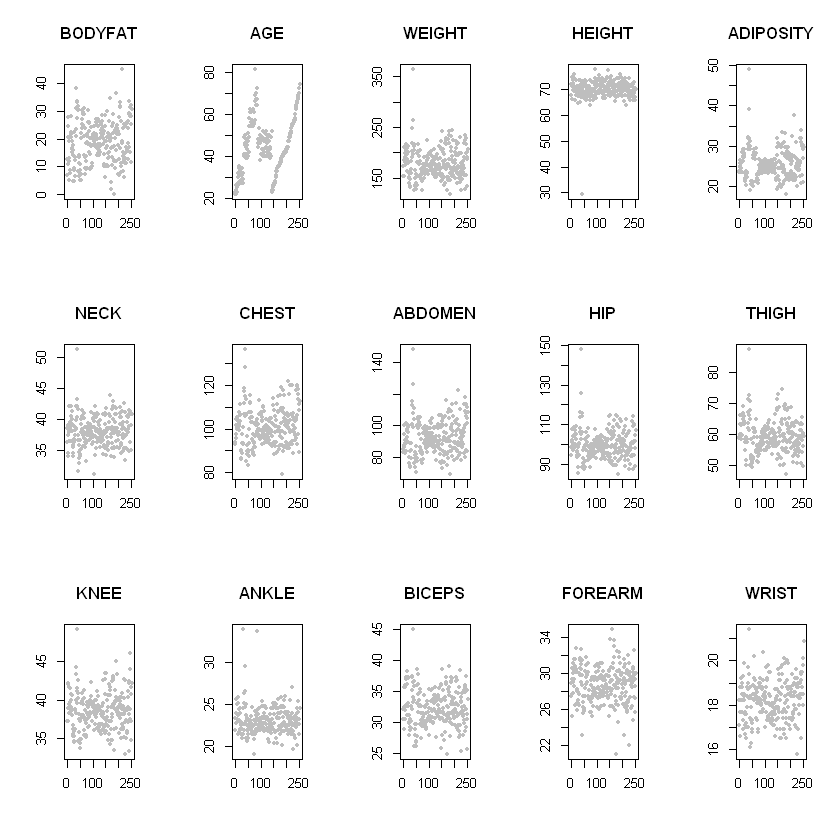

In [22]:
par(mfrow = c(3,5))
for(i in 1:15){
  plot(data[,i], main = colnames(data)[i], ylab = "", xlab = "", 
       pch = 20, col = "gray")
}
par(mfrow = c(1,1))

### potential outliers

In [23]:
RMIndex = which(data[,1]<2 | data[,1]==max(data[,1]) | 
                  data[,3]==max(data[,3]) | data[,4]==min(data[,4]) | 
                  data[,5] > 35 | 
                  data[,6]==max(data[,6]) | data[,7]>125 | 
                  data[,8]==max(data[,8]) | data[,9]>120 | 
                  data[,10]==max(data[,10]) | data[,11]==max(data[,11]) | 
                  data[,11]==max(data[,11]) | data[,12]>29 | 
                  data[,13]==max(data[,13]))

data[RMIndex,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
31,12.3,32,182.00,73.75,23.6,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,33.1,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,31.7,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
172,1.9,35,125.75,65.50,20.6,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
182,0.0,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
216,45.1,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### scatter plot matrix

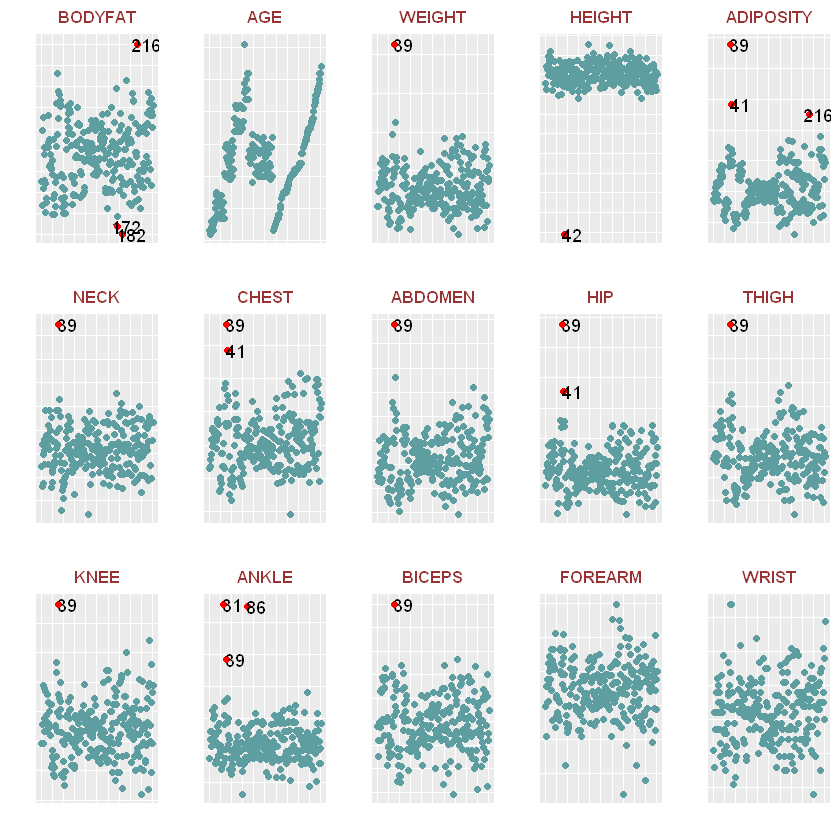

In [18]:
pcolor = "cadetblue"

color = rep(pcolor, 252)
color[data[,1]<2 | data[,1]==max(data[,1])] = "red"
sp1 = ggplot(data, aes(y=BODYFAT, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,1]<2 | data[,1]==max(data[,1]),1], 
           x = which(data[,1]<2 | data[,1]==max(data[,1]))+20,  
           label= which(data[,1]<2 | data[,1]==max(data[,1]))) + 
  ggtitle("BODYFAT") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
sp2 = ggplot(data, aes(y=AGE, x = index)) + geom_point(color = color) + 
  ggtitle("BODYFAT") + xlab("") + ylab("") + 
  ggtitle("AGE") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,3]==max(data[,3])] = "red"
sp3 = ggplot(data, aes(y=WEIGHT, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,3]==max(data[,3]),3], 
           x = which(data[,3]==max(data[,3]))+20,  
           label= which(data[,3]==max(data[,3]))) + 
  ggtitle("BODYFAT") + xlab("") + ylab("") + 
  ggtitle("WEIGHT") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,4]==min(data[,4])] = "red"
sp4 = ggplot(data, aes(y=HEIGHT, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,4]==min(data[,4]),4], 
           x = which(data[,4]==min(data[,4]))+20,  
           label= which(data[,4]==min(data[,4]))) + 
  ggtitle("HEIGHT") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,5] > 35] = "red"
sp5 = ggplot(data, aes(y=ADIPOSITY, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,5] > 35,5], 
           x = which(data[,5] > 35)+20,  
           label= which(data[,5] > 35)) + 
  ggtitle("ADIPOSITY") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,6]==max(data[,6])] = "red"
sp6 = ggplot(data, aes(y=NECK, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,6]==max(data[,6]),6], 
           x = which(data[,6]==max(data[,6]))+20,  
           label= which(data[,6]==max(data[,6]))) + 
  ggtitle("NECK") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,7]>125] = "red"
sp7 = ggplot(data, aes(y=CHEST, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,7]>125,7], 
           x = which(data[,7]>125)+20,  
           label= which(data[,7]>125)) + 
  ggtitle("CHEST") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,8]==max(data[,8])] = "red"
sp8 = ggplot(data, aes(y=ABDOMEN, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,8]==max(data[,8]),8], 
           x = which(data[,8]==max(data[,8]))+20,  
           label= which(data[,8]==max(data[,8]))) + 
  ggtitle("ABDOMEN") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,9]>120] = "red"
sp9 = ggplot(data, aes(y=HIP, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,9]>120,9], 
           x = which(data[,9]>120)+20,  
           label= which(data[,9]>120)) + 
  ggtitle("HIP") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,10]==max(data[,10])] = "red"
sp10 = ggplot(data, aes(y=THIGH, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,10]==max(data[,10]),10], 
           x = which(data[,10]==max(data[,10]))+20,  
           label= which(data[,10]==max(data[,10]))) + 
  ggtitle("THIGH") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,11]==max(data[,11])] = "red"
sp11 = ggplot(data, aes(y=KNEE, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,11]==max(data[,11]),11], 
           x = which(data[,11]==max(data[,11]))+20,  
           label= which(data[,11]==max(data[,11]))) + 
  ggtitle("KNEE") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,12]>29] = "red"
sp12 = ggplot(data, aes(y=ANKLE, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,12]>29,12], 
           x = which(data[,12]>29)+20,  
           label= which(data[,12]>29)) + 
  ggtitle("ANKLE") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
color[data[,13]==max(data[,13])] = "red"
sp13 = ggplot(data, aes(y=BICEPS, x = index)) + geom_point(color = color) + 
  annotate("text", y = data[data[,13]==max(data[,13]),13], 
           x = which(data[,13]==max(data[,13]))+20,  
           label= which(data[,13]==max(data[,13]))) + 
  ggtitle("BICEPS") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
sp14 = ggplot(data, aes(y=FOREARM, x = index)) + geom_point(color = color) + 
  ggtitle("FOREARM") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

color = rep(pcolor, 252)
sp15 = ggplot(data, aes(y=WRIST, x = index)) + geom_point(color = color) + 
  ggtitle("WRIST") + xlab("") + ylab("") + 
  theme(plot.title = element_text(color="#993333", size=10, face="bold",hjust = 0.5), 
        axis.text = element_blank(), axis.ticks = element_blank())

ggarrange(sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10,sp11,sp12,sp13,sp14,sp15,ncol=5,nrow=3)

### modify height of NO.42

In [24]:
c1 = 0.4535922921969
c2 = 0.0254
height42 = sqrt(data[42,3]*c1/data[42,5])/c2
data[42, 4] = height42
RMIndex = c(31, 39, 86, 172, 182, 216)
index = 1:252
index = index[-RMIndex]

### compare recalculated bmi and ADIPOSITY

In [26]:
bmi = data[,3]*c1/(data[,4]*c2)^2
bmi_error_index = which(abs(bmi-data[,5])>1)
print(bmi_error_index)
print(data[bmi_error_index,5])
print(bmi[bmi_error_index])

[1] 163 221
[1] 24.4 24.5
[1] 27.40693 21.67806


In [27]:
data[bmi_error_index,5] = bmi[bmi_error_index]

### simple linear regression

In [29]:
lm.naive = lm(BODYFAT~., data = data[-RMIndex,])
summary(lm.naive)


Call:
lm(formula = BODYFAT ~ ., data = data[-RMIndex, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5930 -2.7941 -0.0726  2.6856  9.0127 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.62325   55.93741  -0.851  0.39545    
AGE           0.05849    0.03022   1.935  0.05418 .  
WEIGHT       -0.15907    0.15611  -1.019  0.30928    
HEIGHT        0.56474    0.79924   0.707  0.48053    
ADIPOSITY     1.14036    1.13160   1.008  0.31463    
NECK         -0.36288    0.21825  -1.663  0.09773 .  
CHEST        -0.12259    0.10299  -1.190  0.23512    
ABDOMEN       0.80991    0.08503   9.525  < 2e-16 ***
HIP          -0.18890    0.13741  -1.375  0.17055    
THIGH         0.18179    0.13828   1.315  0.18993    
KNEE          0.05234    0.23442   0.223  0.82353    
ANKLE        -0.06360    0.33398  -0.190  0.84914    
BICEPS        0.11559    0.15965   0.724  0.46980    
FOREARM       0.24847    0.19265   1.290  0.19843    
WRIST        -1.55816  

In [30]:
vif(lm.naive)

AGE     WEIGHT     HEIGHT  ADIPOSITY       NECK      CHEST    ABDOMEN 
  2.340411 279.200989  67.797135 216.416090   3.945240  10.899283  11.556725 
       HIP      THIGH       KNEE      ANKLE     BICEPS    FOREARM      WRIST 
 12.486909   7.362728   4.709130   3.203560   3.423235   2.431736   3.512150

In [31]:
mean(vif(lm.naive))

[1] 44.94895

### Model Diagnostics

Warning message in is.na(x):
"is.na()不适用于类别为'expression'的非串列或非矢量"Warning message in is.na(x):
"is.na()不适用于类别为'expression'的非串列或非矢量"

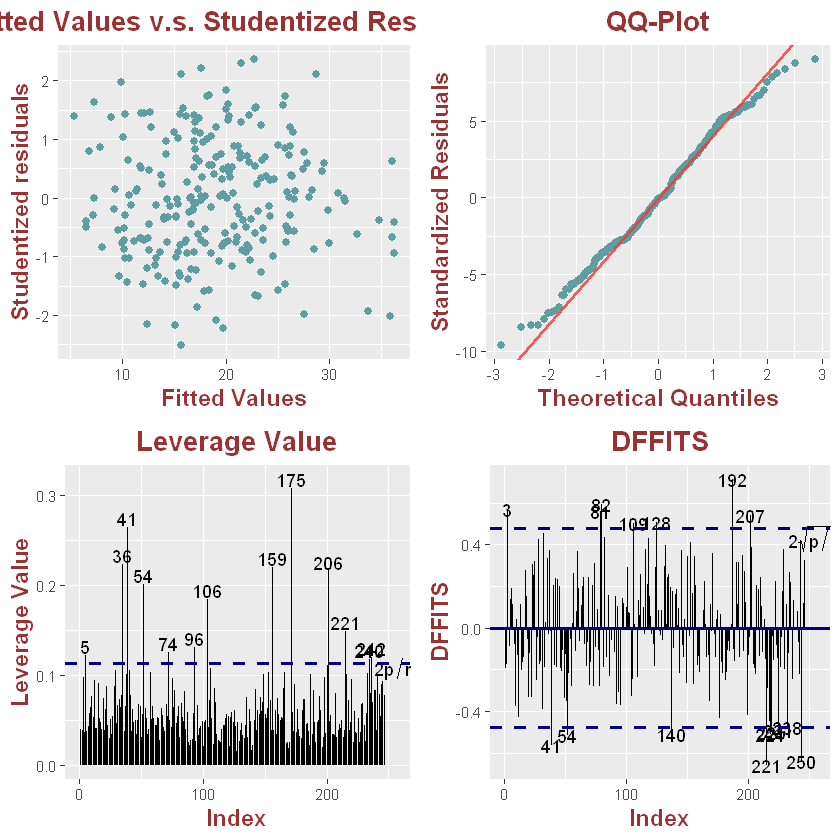

In [32]:
# scatter plot
df = data.frame(fit = lm.naive$fitted.values, res = lm.naive$residuals)
rp1 = ggplot(df,aes(x = fit, y = res)) + geom_point(color = pcolor, cex = 2) + 
  ggtitle("Fitted Values v.s. Studentized Residuals") +
  xlab("Fitted Values") + ylab("Studentized residuals") + 
  theme(plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
        axis.title.x = element_text(color="#993333", size=14, face="bold"),
        axis.title.y = element_text(color="#993333", size=14, face="bold")) + 
  geom_smooth(method = lm, se = TRUE)

# qq plot
q1 = quantile(lm.naive$residuals, c(0.25, 0.75), type = 5)
q2 = qnorm(c(0.25, 0.75))
slope = diff(q1)/diff(q2)
int = q1[1]-slope*q2[1]
qp1 = ggplot() +
  geom_qq(aes(sample = lm.naive$residuals), color = pcolor, cex = 2) +
  geom_abline(intercept = int, slope = slope,
              color = "brown2", size = 1, alpha = 0.8)+
  ggtitle("QQ-Plot") + ylab("Standardized Residuals") + xlab("Theoretical Quantiles") + 
  theme(plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
        axis.title.x = element_text(color="#993333", size=14, face="bold"),
        axis.title.y = element_text(color="#993333", size=14, face="bold"))

### Studentized Residual

lm.stdres = stdres(lm.naive)
df = data.frame(fit = lm.naive$fitted.values, str = lm.stdres)
srp1 = ggplot(df,aes(x = fit, y = str)) + geom_point(color = pcolor, cex = 2) + 
  ggtitle("Fitted Values v.s. Studentized Residuals") +
  xlab("Fitted Values") + ylab("Studentized residuals") + 
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))

### Leverage Value

lm.hats=hatvalues(lm.naive)
df = data.frame(x = 1:length(index), y = lm.hats)
h0 = 28/246 # Rule of thumb for judging outliers
srp2 = ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() + 
  annotate("text", x=which(lm.hats>h0), y=lm.hats[lm.hats>h0] + 0.01,  label= index[which(lm.hats>h0)]) +
  annotate("text", x = 255, y = h0-0.007, label = expression(2*p/n)) + 
  geom_hline(yintercept=h0, linetype= "dashed", color = "navyblue", size=1) + 
  ggtitle("Leverage Value") + xlab("Index") + ylab("Leverage Value") + 
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))

### DFFITS

lm.dffits = dffits(lm.naive)
df = data.frame(x = 1:length(index), y = lm.dffits)
d0 = 2*sqrt(14/246) # Rule of thumb for judging influential points
srp3 = ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() + 
  annotate("text", x = which(abs(lm.dffits)>d0), y=lm.dffits[abs(lm.dffits)>d0],  label= index[which(abs(lm.dffits)>d0)]) +
  geom_hline(yintercept=c(-1*d0, 0, d0), linetype=c("dashed","solid","dashed"), 
             color = "navyblue", size=1) + 
  annotate("text", x = 255, y = d0-0.05, label = expression(2*sqrt(p/n))) +
  ggtitle("DFFITS") + xlab("Index") + ylab("DFFITS") + 
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))

### Cook's Distance

lm.cooksD=cooks.distance(lm.naive)
df = data.frame(x = 1:length(index), y = lm.cooksD)
c0 = qf(0.5, 14, 232)
srp4 = ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() + 
  geom_hline(yintercept=c0, linetype= "dashed", color = "navyblue", size=1) + 
  annotate("text", x = 255, y = c0-0.05, label = expression(F[paste("p,n-p", sep="")])) +
  ggtitle("Cook's Distance") + xlab("Index") + ylab("Cook's Distance") + 
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))

ggarrange(srp1, qp1, srp2, srp3, ncol=2, nrow=2)

In [33]:
data[index[which(lm.hats>h0 & abs(lm.dffits)>d0)],]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
41,33.1,45,262.75,68.75,39.10000,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
54,7.1,49,152.75,73.50,19.90000,35.1,93.3,79.6,91.6,52.6,37.6,22.6,38.5,27.4,18.5
221,12.7,54,153.25,70.50,21.67806,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


### save modified data

In [35]:
data.mod = data.original[-RMIndex,]
data.mod[,c(-1,-3)] = data[-RMIndex,]
write.csv(data.mod, file = "data/Modyfied_BodyFat.csv", row.names = FALSE)

## Model Selection

### forward AIC selection

In [36]:
biggest = formula(lm(BODYFAT~., data[-RMIndex,]))
step(lm(BODYFAT~1, data = data[-RMIndex,]), direction = "both", scope = biggest)

Start:  AIC=986.04
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    8905.8  4527.7 720.51
+ ADIPOSITY  1    7055.8  6377.7 804.79
+ CHEST      1    6307.6  7125.9 832.08
+ HIP        1    5190.7  8242.8 867.89
+ WEIGHT     1    4924.6  8508.9 875.71
+ THIGH      1    4034.7  9398.8 900.18
+ KNEE       1    3428.2 10005.3 915.56
+ NECK       1    2895.3 10538.2 928.33
+ BICEPS     1    2890.1 10543.4 928.45
+ FOREARM    1    1661.8 11771.6 955.56
+ WRIST      1    1355.0 12078.5 961.89
+ ANKLE      1    1103.1 12330.4 966.97
+ AGE        1    1053.9 12379.6 967.94
<none>                   13433.5 986.04
+ HEIGHT     1       3.3 13430.2 987.98

Step:  AIC=720.51
BODYFAT ~ ABDOMEN

            Df Sum of Sq     RSS    AIC
+ WEIGHT     1     610.2  3917.5 686.90
+ WRIST      1     567.9  3959.8 689.54
+ HEIGHT     1     467.3  4060.5 695.72
+ NECK       1     381.3  4146.5 700.87
+ ANKLE      1     327.4  4200.3 704.04
+ HIP        1     262.5  4265.2 707.82
+ KNEE    


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS, data = data[-RMIndex, 
    ])

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST       BICEPS  
   -25.7433       0.8791      -0.1035      -1.3965       0.2279  


In [37]:
summary(lm(BODYFAT~ABDOMEN+WEIGHT+WRIST+BICEPS, data[-RMIndex,]))


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS, data = data[-RMIndex, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1900 -2.8154 -0.1131  2.9533  8.6847 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -25.74333    6.43701  -3.999 8.45e-05 ***
ABDOMEN       0.87913    0.05164  17.023  < 2e-16 ***
WEIGHT       -0.10347    0.02528  -4.094 5.80e-05 ***
WRIST        -1.39650    0.39509  -3.535 0.000489 ***
BICEPS        0.22788    0.13942   1.635 0.103455    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.918 on 241 degrees of freedom
Multiple R-squared:  0.7246,	Adjusted R-squared:   0.72 
F-statistic: 158.5 on 4 and 241 DF,  p-value: < 2.2e-16


### Pairwise Plot

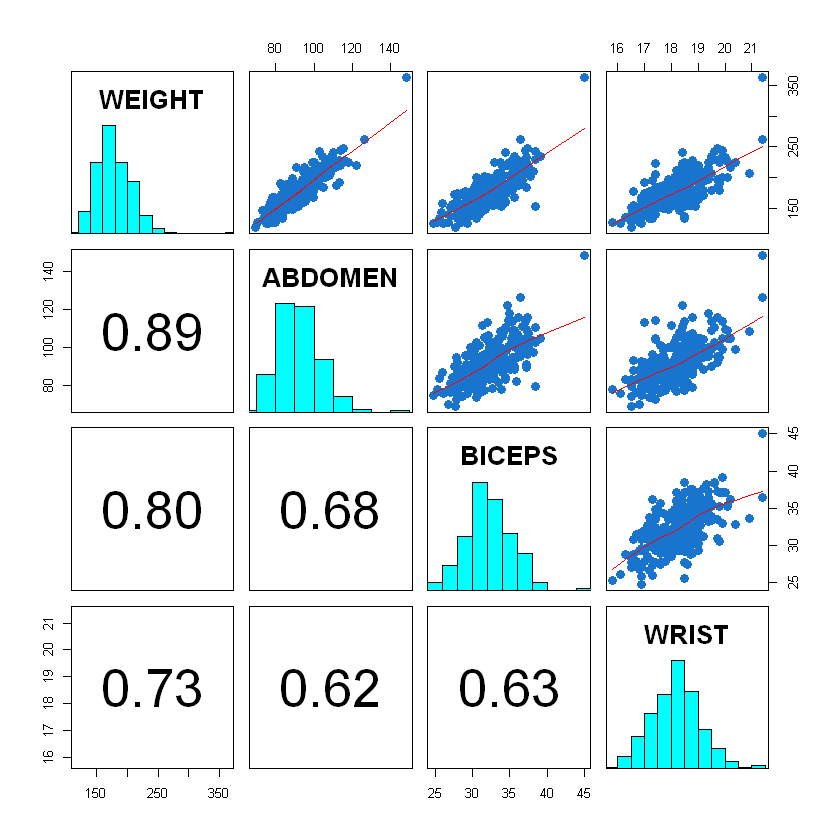

In [38]:
panel.hist_line = function(x,...)
{
  usr = par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2],0,1.5))
  h = hist(x,plot = FALSE)
  breaks = h$breaks;nB = length(breaks)
  y = h$counts;y = y/max(y)
  rect(breaks[-nB],0,breaks[-1],y,col = "cyan")
}
panel_cor = function(x,y,digits = 2,prefix = "",cex.cor,...)
{
  usr = par("usr"); on.exit(par(usr))
  par(usr = c(0,1,0,1))
  r = abs(cor(x,y))
  txt = format(c(r,0.123456789),digits = digits)[1]
  txt = paste0(prefix,txt)
  if(missing(cex.cor)) cex.cor = 0.8/strwidth(txt)
  text(0.5,0.5,txt,cex = 4)
}
pairs(data[,c(3,8,13,15)],upper.panel = panel.smooth,lower.panel = panel_cor,
      cex = 1.5,pch = 16,col = "dodgerblue3", bg = "navy blue",
      diag.panel = panel.hist_line, cex.labels = 2,font.labels = 2)

### R^2, Cp, bic, best subset

In [39]:
my.regsub <- function(matrix,y,nbest,method,nvmax=8){
  temp <- regsubsets(matrix,y,nbest=nbest,method=method,nvmax=nvmax)
  temp.mat <- cbind(summary(temp)$which,
                    summary(temp)$rsq,summary(temp)$rss,
                    summary(temp)$adjr2,summary(temp)$cp,
                    summary(temp)$bic)
  dimnames(temp.mat)[[2]] <- c(dimnames(summary(temp)$which)[[2]],
                               "rsq", "rss", "adjr2", "cp", "bic")
  return(temp.mat)
}

N = 3
sele = my.regsub(data[-RMIndex,c(3,8,13,15)],y=data[-RMIndex,1],nbest=N,nvmax = N,method="exhaustive")
sele[order(sele[,which(colnames(sele) == 'rsq')],decreasing = TRUE),]

,(Intercept),WEIGHT,ABDOMEN,BICEPS,WRIST,rsq,rss,adjr2,cp,bic
3,1,1,1,0,1,0.7215197,3740.961,0.7180675,5.671657,-292.46707
3,1,1,1,1,0,0.7102945,3891.756,0.7067031,15.493820,-282.74569
2,1,1,1,0,0,0.7083749,3917.543,0.7059746,15.173503,-286.62637
3,1,0,1,1,1,0.7054212,3957.220,0.7017694,19.757932,-278.64206
2,1,0,1,0,1,0.7052308,3959.779,0.7028047,17.924565,-283.98841
2,1,0,1,1,0,0.6702921,4429.128,0.6675784,48.496131,-256.43284
1,1,0,1,0,0,0.6629524,4527.725,0.6615710,52.918394,-256.52198
1,1,1,0,0,0,0.3665898,8508.908,0.3639939,312.237156,-101.32206
1,1,0,0,1,0,0.2151378,10543.438,0.2119211,444.758501,-48.58211


### global best subset

In [41]:
sele = my.regsub(data[-RMIndex,2:15],y=data[-RMIndex,1],nbest=N,nvmax = N,method="exhaustive")
sele[order(sele[,which(colnames(sele) == 'rsq')],decreasing = TRUE),]

,(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,rss,adjr2,cp,bic
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7215197,3740.961,0.7180675,7.515235,-292.4671
3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7202763,3757.665,0.7168087,8.611477,-291.3711
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.7170458,3801.062,0.7135381,11.459552,-288.5464
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7083749,3917.543,0.7059746,17.104103,-286.6264
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.7052308,3959.779,0.7028047,19.875979,-283.9884
2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.6977357,4060.463,0.6952480,26.483807,-277.8116
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6629524,4527.725,0.6615710,55.149697,-256.5220
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5252362,6377.734,0.5232904,176.563804,-172.2440
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.4695412,7125.912,0.4673672,225.665913,-144.9565


### final model

In [42]:
lm.final = lm(BODYFAT~WEIGHT+ABDOMEN, data[-RMIndex,])
summary(lm.final)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN, data = data[-RMIndex, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0357  -2.9598  -0.0551   2.8637   9.9458 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.44787    2.49994 -16.580  < 2e-16 ***
WEIGHT       -0.12070    0.01962  -6.152 3.13e-09 ***
ABDOMEN       0.88646    0.05253  16.876  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.015 on 243 degrees of freedom
Multiple R-squared:  0.7084,	Adjusted R-squared:  0.706 
F-statistic: 295.1 on 2 and 243 DF,  p-value: < 2.2e-16


### model diagnostics

Warning message in is.na(x):
"is.na()不适用于类别为'expression'的非串列或非矢量"Warning message in is.na(x):
"is.na()不适用于类别为'expression'的非串列或非矢量"

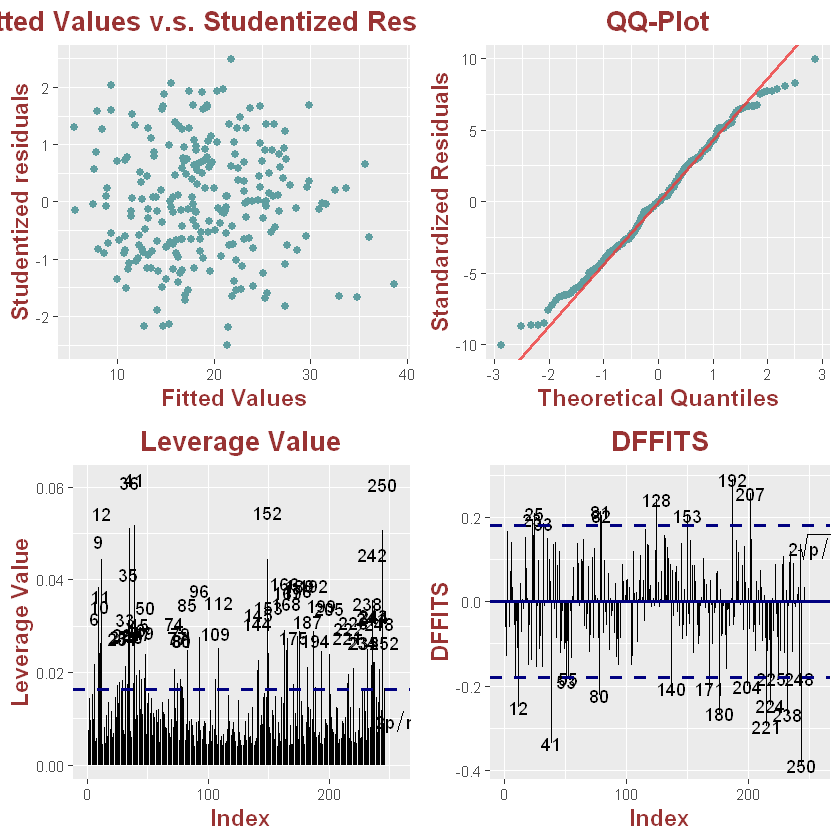

In [43]:
# scatter plot
df = data.frame(fit = lm.final$fitted.values, res = lm.final$residuals)
rp2 = ggplot(df,aes(x = fit, y = res)) + geom_point(color = pcolor, cex = 2) + 
  ggtitle("Fitted Values v.s. Studentized Residuals") +
  xlab("Fitted Values") + ylab("Studentized residuals") + 
  theme(plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
        axis.title.x = element_text(color="#993333", size=14, face="bold"),
        axis.title.y = element_text(color="#993333", size=14, face="bold")) + 
  geom_smooth(method = lm, se = TRUE)

# qq plot
q1 = quantile(lm.final$residuals, c(0.25, 0.75), type = 5)
q2 = qnorm(c(0.25, 0.75))
slope = diff(q1)/diff(q2)
int = q1[1]-slope*q2[1]
qp2 = ggplot() +
  geom_qq(aes(sample = lm.final$residuals), color = pcolor, cex = 2) +
  geom_abline(intercept = int, slope = slope,
              color = "brown2", size = 1, alpha = 0.8)+
  ggtitle("QQ-Plot") + ylab("Standardized Residuals") + xlab("Theoretical Quantiles") + 
  theme(plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
        axis.title.x = element_text(color="#993333", size=14, face="bold"),
        axis.title.y = element_text(color="#993333", size=14, face="bold"))

### influential points diag

lm.stdres = stdres(lm.final)
df = data.frame(fit = lm.final$fitted.values, str = lm.stdres)
srpf1 = ggplot(df,aes(x = fit, y = str)) + geom_point(color = pcolor, cex = 2) +
  ggtitle("Fitted Values v.s. Studentized Residuals") +
  xlab("Fitted Values") + ylab("Studentized residuals") +
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))
lm.hats=hatvalues(lm.final)
df = data.frame(x = 1:length(index), y = lm.hats)
h0 = 4/246 # Rule of thumb for judging outliers
srpf2 = ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() +
  annotate("text", x=which(lm.hats>h0), y=lm.hats[lm.hats>h0] + 0.01,  label= index[which(lm.hats>h0)]) +
  annotate("text", x = 255, y = h0-0.007, label = expression(2*p/n)) +
  geom_hline(yintercept=h0, linetype= "dashed", color = "navyblue", size=1) +
  ggtitle("Leverage Value") + xlab("Index") + ylab("Leverage Value") +
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))
lm.dffits = dffits(lm.final)
df = data.frame(x = 1:length(index), y = lm.dffits)
d0 = 2*sqrt(2/246) # Rule of thumb for judging influential points
srpf3 = ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() +
  annotate("text", x = which(abs(lm.dffits)>d0), y=lm.dffits[abs(lm.dffits)>d0],  label= index[which(abs(lm.dffits)>d0)]) +
  geom_hline(yintercept=c(-1*d0, 0, d0), linetype=c("dashed","solid","dashed"),
             color = "navyblue", size=1) +
  annotate("text", x = 255, y = d0-0.05, label = expression(2*sqrt(p/n))) +
  ggtitle("DFFITS") + xlab("Index") + ylab("DFFITS") +
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))
lm.cooksD=cooks.distance(lm.final)
df = data.frame(x = 1:length(index), y = lm.cooksD)
c0 = qf(0.5, 2, 244)
srpf4 = ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() +
  geom_hline(yintercept=c0, linetype= "dashed", color = "navyblue", size=1) +
  annotate("text", x = 255, y = c0-0.05, label = expression(F[paste("p,n-p", sep="")])) +
  ggtitle("Cook's Distance") + xlab("Index") + ylab("Cook's Distance") +
  theme( plot.title = element_text(color="#993333", size=16, face="bold",hjust = 0.5),
         axis.title.x = element_text(color="#993333", size=14, face="bold"),
         axis.title.y = element_text(color="#993333", size=14, face="bold"))

ggarrange(srpf1, qp2, srpf2, srpf3, ncol=2, nrow=2)

### box and regression line

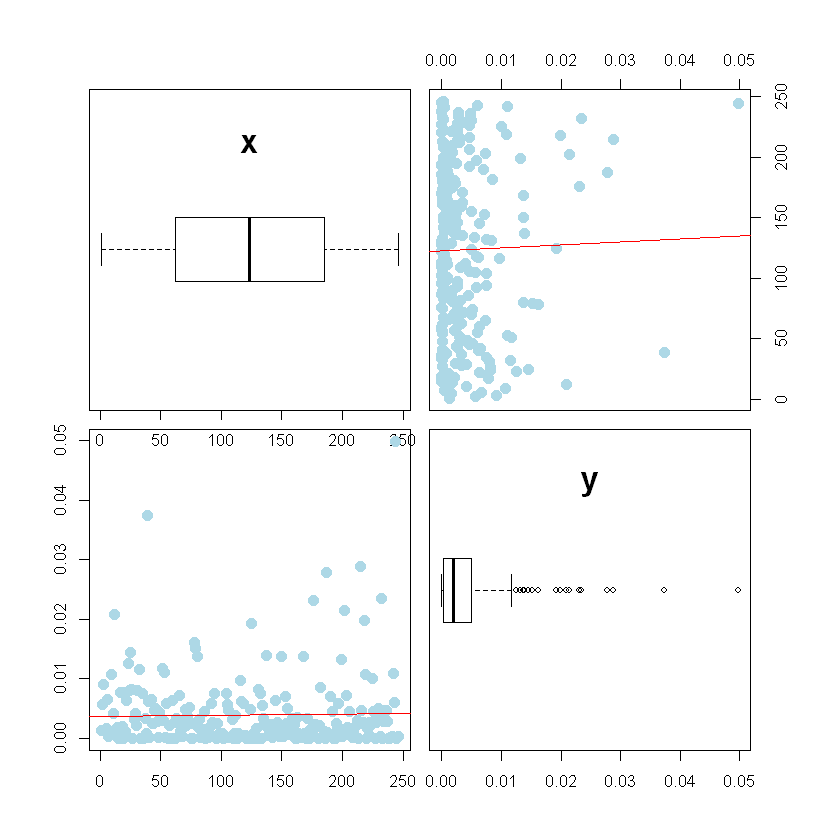

In [46]:
panel.box <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[3:4],0, 2 ))
  #par(usr = c(min(x)-1.5*IQR(x),max(x)+1.5*IQR(x), 0,2 ))
  boxplot(x,horizontal = TRUE, add=TRUE)
}

pairs(df,panel =function(x,y,...){
  points(x,y,...)
  abline(lm(y~x),col = 'red')
},
cex = 1.5,pch = 16, col = "light blue",
diag.panel = panel.box, cex.labels = 2,font.labels = 2)

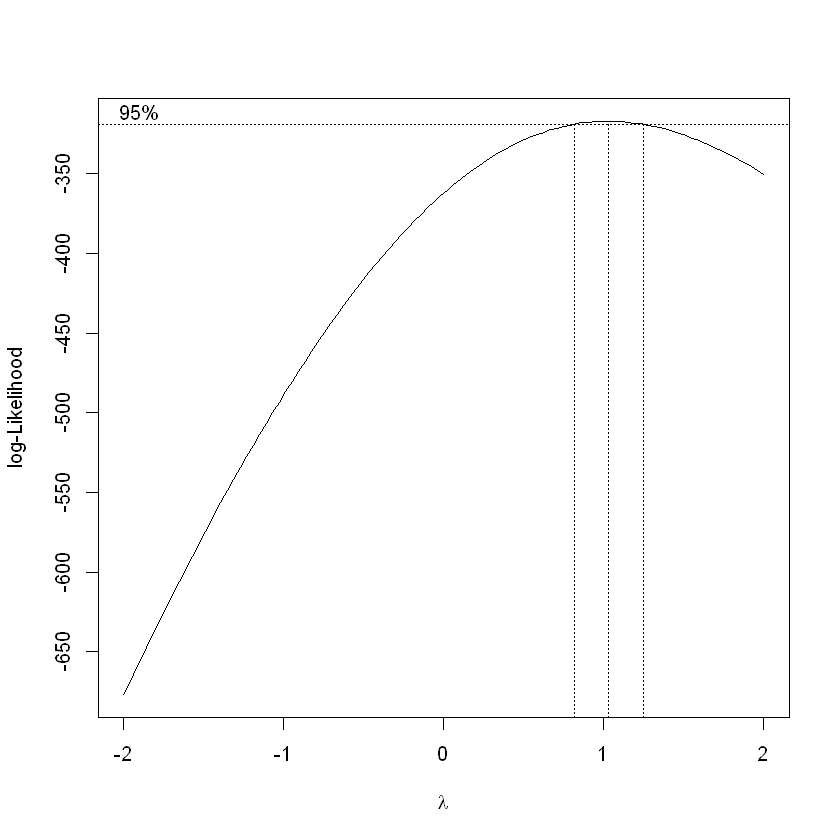

In [44]:
boxcox(lm.final)